Neural Network Math Experiment Tool

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# we need this in later phases
def activation_ReLu(value):
    if value > 0:
        return value
    else: 
        return 0
    
# we need this in later phases
def activation_ReLu_partial_derivative(value):
    if value > 0:
        return 1
    else: 
        return 0

In [2]:
# lock down the randomness
np.random.seed(123)

def generate_test_data():
    result = []

    # create 50 numbers
    for x in range(100):
        n1 = np.random.randint(0, 5)
        n2 = np.random.randint(3, 7)
        n3 = n1 ** 2 + n2 + np.random.randint(0, 5)
        n3 = int(n3)

        # add this data row to the list
        result.append([n1, n2, n3])

    return result

In [3]:
# initialize weights and biases
w1 = 1
w2 = 0.5
w3 = 1
w4 = -0.5
w5 = 1
w6 = 1

# and the biases
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# save the original weights and biases for comparison in the end
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# learning rate for gradient descent (optimizer)
LR = 0.01
epochs =  50

# our data
# y = x1 ^ 2 + x2 + 1
data = [
    [1, 0, 2],
    [2, 1, 6],
    [3, 3, 17]
]

# replace with generated data (30 rows)
data = generate_test_data()

loss_points = []

# train the neural network
for epoch in range(epochs):
    for row in data:
        # unpack the data into original variables
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]

        # FORWARD PASS

        # NODE 1 OUTPUT
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)
        node_1_output

        # NODE 2 OUTPUT
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)
        node_2_output

        # NODE 3 OUTPUT 
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)
        node_3_output

        # calculate the loss for this forward pass
        predicted_value = node_3_output

        # note to self in future
        # this will probably crash if the loss value gets too high
        # replace with NumPy float64 if needed
        loss = (predicted_value - true_value) ** 2

        # BACK PROPAGATION - LAST LAYER

        # partial derivative of loss function with respect to w5
        # use gradient descent to get updated value for w5
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5

        # partial derivative of loss function with respect to w6
        # use gradient descent to get updated value for w6
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6

        # partial derivative of loss function with respect to bias 3
        # use gradient descent to get updated value for bias 3
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # FROM THIS POINT FORWARD, WE HAVE TO USE THE CHAIN RULE
        # IN ORDER TO ACCESS THE NEXT LAYER AFTER THE FINAL LAYER

        # chain rule + partial derivations to solve new value for w1
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative((input1 * w1) + (input2 * w3) + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        # chain rule + partial derivations to solve new value for w2
        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative((input1 * w2) + (input2 * w4) + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        # chain rule + partial derivations to solve new value for w3
        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative((input1 * w1) + (input2 * w3) + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        # chain rule + partial derivations to solve new value for w4
        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative((input1 * w2) + (input2 * w4) + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # chain rule + partial derivations to solve new value for bias 1
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        # chain rule + partial derivations to solve new value for bias 2
        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # finally replace old weights with the new ones
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    

    loss_points.append(loss)
    print(f"Epoch: {epoch + 1}, loss: {loss}")

print("--------------------------")
print("ORIGINAL WEIGHTS/BIASES:\n")
print(f"W1: {original_w1}")
print(f"W2: {original_w2}")
print(f"W3: {original_w3}")
print(f"W4: {original_w4}")
print(f"W5: {original_w5}")
print(f"W6: {original_w6}")
print(f"B1: {original_b1}")
print(f"B2: {original_b2}")
print(f"B3: {original_b3}")

print("--------------------------")
print("FINAL WEIGHTS/BIASES:\n")
print(f"W1: {w1}")
print(f"W2: {w2}")
print(f"W3: {w3}")
print(f"W4: {w4}")
print(f"W5: {w5}")
print(f"W6: {w6}")
print(f"B1: {bias1}")
print(f"B2: {bias2}")
print(f"B3: {bias3}")

Epoch: 1, loss: 47.099487762620335
Epoch: 2, loss: 25.397147288424918
Epoch: 3, loss: 23.018372310372865
Epoch: 4, loss: 22.711683294072945
Epoch: 5, loss: 22.67116480900928
Epoch: 6, loss: 22.665793982431616
Epoch: 7, loss: 22.665081753581013
Epoch: 8, loss: 22.664987298947644
Epoch: 9, loss: 22.664974772430917
Epoch: 10, loss: 22.664973111170035
Epoch: 11, loss: 22.6649728908544
Epoch: 12, loss: 22.664972861636226
Epoch: 13, loss: 22.664972857761303
Epoch: 14, loss: 22.66497285724743
Epoch: 15, loss: 22.664972857179304
Epoch: 16, loss: 22.664972857170255
Epoch: 17, loss: 22.66497285716902
Epoch: 18, loss: 22.66497285716892
Epoch: 19, loss: 22.6649728571689
Epoch: 20, loss: 22.6649728571689
Epoch: 21, loss: 22.6649728571689
Epoch: 22, loss: 22.6649728571689
Epoch: 23, loss: 22.6649728571689
Epoch: 24, loss: 22.6649728571689
Epoch: 25, loss: 22.6649728571689
Epoch: 26, loss: 22.6649728571689
Epoch: 27, loss: 22.6649728571689
Epoch: 28, loss: 22.6649728571689
Epoch: 29, loss: 22.6649728

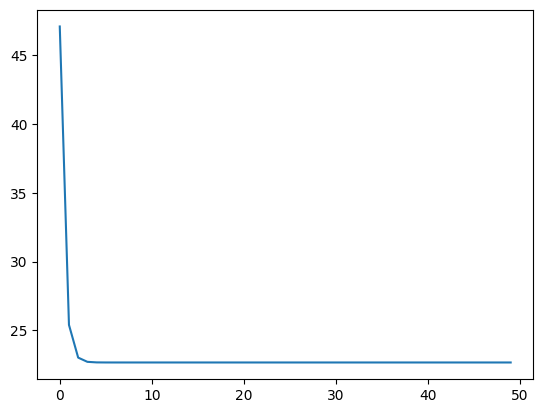

In [4]:
# plot the loss for the epochs

plt.plot(loss_points)
plt.show()

In [5]:
 # prediction is basically just doing the forward 
# pass again (but only that)
def predict(x1, x2):
    # NODE 1 OUTPUT
    node_1_output = x1 * w1 + x2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)
    node_1_output

    # NODE 2 OUTPUT
    node_2_output = x1 * w2 + x2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)
    node_2_output

    # NODE 3 OUTPUT 
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)
    node_3_output

    return node_3_output

In [6]:
predict(1, 0)

6.0301315055363425